In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
x = np.random.uniform(-1, 1, size=(1000, 2))
y = -0.5 * x[:, 0] < 2 * x[:, 1]
x = np.c_[x,np.ones(x.shape[0])]

In [3]:
def grad(x, y, theta):
  l = len(y)
  cur = 0
  for i in range(l):
    cur += x[i] * (y[i] - 1/(1 + math.exp(-x[i] @ theta)))
  return -cur/l

In [4]:
def sgd(x, y, n = 1000, alfa = 0.1, eps = 10**(-5)):
  theta_init = np.zeros(x.shape[1])
  theta_cur = theta_init + 100

  for i in range(n):
    theta_cur = theta_init - alfa * grad(x, y, theta_init)
    if np.linalg.norm(theta_cur - theta_init) < eps:
      return theta_init
    else:
      theta_init = theta_cur
  return theta_init

In [5]:
theta = sgd(x, y)
theta

array([ 1.14141076,  5.73109826, -0.05783943])

In [6]:
y_new = []
for i in range(len(y)):
  y_new.append(1/(1 + math.exp(-x[i] @ theta)))
y_new = np.array(y_new)

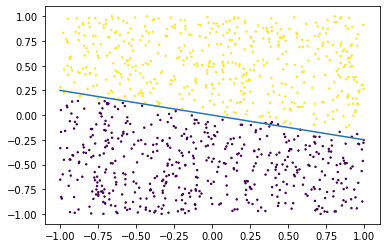

In [7]:
plt.scatter(x[:, 0], x[:, 1], s=2, c=(y_new > 0.5))
plt.plot(np.linspace(-1, 1, 1000), -(0.5 / 2) * np.linspace(-1, 1, 1000))